In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
start = '2015-01-01'
end = '2017-01-01'

united = get_pricing('UAL', start_date=start,end_date=end)
american = get_pricing('AAL', start_date=start,end_date=end)

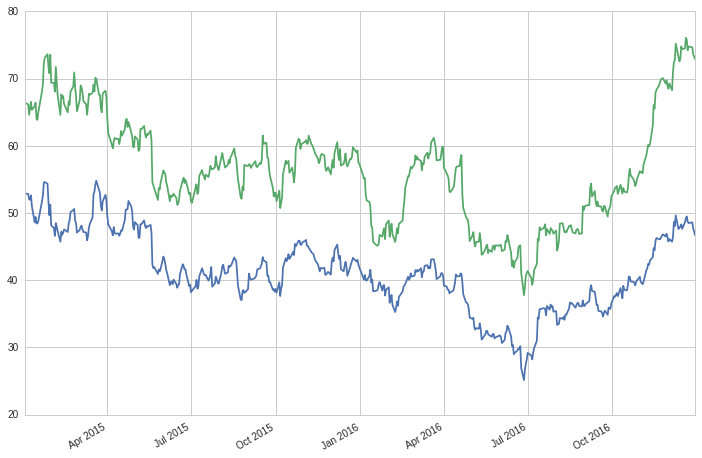

In [6]:
american['close_price'].plot(label='AA',figsize=(12,8))
united["close_price"].plot(label="United")

In [7]:
np.corrcoef(american["close_price"], united['close_price'])

array([[ 1.        ,  0.92333958],
       [ 0.92333958,  1.        ]])

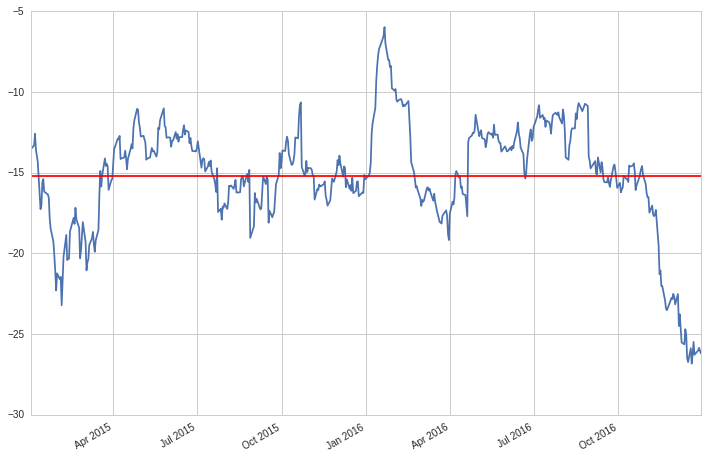

In [9]:
spread = american['close_price'] - united['close_price']
spread.plot(label='Spread', figsize=(12,8))
plt.axhline(spread.mean(), c='r')

In [15]:
def zscore(stocks):
    return((stocks - stocks.mean()) / np.std(stocks))

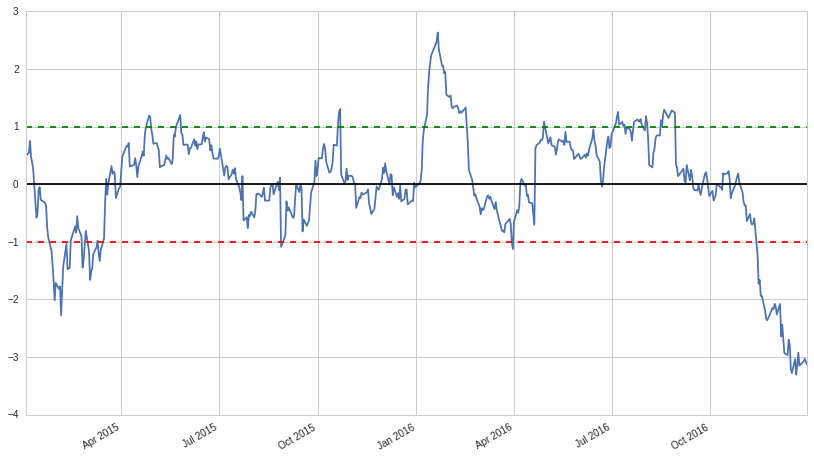

In [16]:
zscore(spread).plot(figsize=(14,8))
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(1.0, c='g', ls='--')
plt.axhline(-1.0, c='r',ls='--')

In [17]:
spread_mavg1 = spread.rolling(1).mean()

spread_mavg30 = spread.rolling(30).mean()

std_30 = spread.rolling(30).std()

zscore_30_1 = (spread_mavg1 - spread_mavg30) / std_30


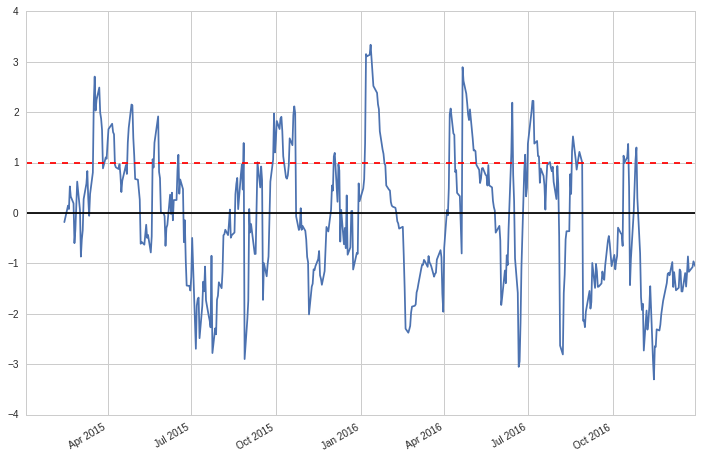

In [19]:
zscore_30_1.plot(figsize=(12,8), label='Rolling 30 Day Z score')
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', ls='--')

